### Indeks Standar Pencemaran Udara (ISPU) Tahun 2020

- Link : https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2020
1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
5. co : Carbon Monoksida salah satu parameter yand diukur
6. o3 : Ozon salah satu parameter yang diukur
7. no2 : NItrogen dioksida salah satu parameter yang diukur
8. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
9. critical : Parameter yang hasil pengukurannya paling tinggi
10. categori : Kategori hasil perhitungan indeks standar pencemaran udara

In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


### 1. Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
sns.set(color_codes = True)

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
import imblearn

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Loading the data into the data frame

In [3]:
# read csv data
ispu_jan = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv')
ispu_jan2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2020.csv')
ispu_feb = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2020.csv')
ispu_feb2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2020.csv')
ispu_mar = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2020.csv')
ispu_mar2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2020.csv')
ispu_apr = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2020.csv')
ispu_apr2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2020.csv')
ispu_mei = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-mei-tahun-2020.csv')
ispu_mei2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2020.csv')
ispu_jun = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2020.csv')
ispu_jun2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2020.csv')
ispu_jul = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2020.csv')
ispu_jul2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2020.csv')
ispu_ags = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-agustus-tahun-2020.csv')
ispu_ags2 = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2020.csv')
ispu_sep = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2020.csv')
ispu_okt = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2020.csv')
ispu_nov = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2020.csv')
ispu_des = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2020.csv')

dikarenakan dari bulan september sampai Desember hanya memiliki satu jenis data ispu, maka mau tidak mau harus menggunakan satu jenis data di bulan bulan sebelumnya, yaitu januari sampai agustus untuk digabung datanya dengan data bulan september sampai desember

pertama dek dulu data dari bulan september sampai desember, hanya mengecek nama kolomnya saja

In [4]:
display(ispu_sep.head(1), ispu_okt.head(1),ispu_nov.head(1), ispu_des.head(1))

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-09-01,DKI1 (Bunderan HI),63,20,6,60,11,84,PM25,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-10-01,DKI1 (Bunderan HI),50,19,4,50,10,72.0,PM25,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,01/11/2020,DKI1 (Bunderan HI),49,67,18,10,40,11,PM25,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-12-01,DKI1 (Bunderan HI),22,17,4,19,8,26,PM25,BAIK


Setelah itu, cek data yang memiki dua jenis data, yaitu dari januari sampai agustus, kita cek mana jenis data yang memiliki nama kolom yang sama dengan data yang hanya satu jenis (September - Desember), pertama kita cek dulu jenis data pertama

In [5]:
display(ispu_jan.head(1), ispu_feb.head(1),ispu_mar.head(1),
        ispu_apr.head(1),ispu_mei.head(1),ispu_jun.head(1),
        ispu_jul.head(1),ispu_ags.head(1))

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-01-01,38,36,25,46,9,46,O3,BAIK,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-02-01,57,30,39,73,14,73,O3,SEDANG,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-03-02,22,---,35,213,11,213,4,O3,SANGAT TIDAK SEHAT


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-04-01,51,25,35,129,10,129,O3,TIDAK SEHAT,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-05-01,55,26,21,83,10,83,O3,SEDANG,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-06-01,61,23,22,69,10,69,O3,SEDANG,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-07-01,74,29,15,94,14,94,O3,SEDANG,DKI5


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-08-01,69,22,16,134,14,134,O3,TIDAK SEHAT,DKI5


bisa dilihat, bahwa data jenis pertama menampilkan nama kolom akhir yang berbeda dengan data september sampai desember, yaitu kolom lokasi_spbu, sedangkan pada data september sampai desember kolom akhirnya adalah kolom categori, selanjutnya mari cek jenis data kedua

In [6]:
display( ispu_jan2.head(1), ispu_feb2.head(1), ispu_mar2.head(1),
        ispu_apr2.head(1), ispu_mei2.head(1), ispu_jun2.head(1),
        ispu_jul2.head(1), ispu_ags2.head(1))

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,O3,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-02-01,DKI1 (Bunderan HI),29,8,19,27,14,29,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-03-01,45,5,13,28,8,45,1.0,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-04-01,DKI1 (Bunderan HI),38,6,12,67,10,67,O3,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-05-01,DKI1 (Bunderan HI),47,2,---,38,10,47,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-06-01,DKI1 (Bunderan HI),50,14,10,45,9,50,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-07-01,DKI1 (Bunderan HI),69,18,6,65,11,69,PM10,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-08-01,DKI1 (Bunderan HI),65,18,7,84,13,84,O3,SEDANG


dikarenakan data jenis kedua memiliki semua nama kolom yang sama dengan data sepetember - Desember, maka kita akan menggabungkan data jenis kedua dengan data September - Desember, tapi sebelum itu, mari kita cek data untuk bulan maret jenis kedua yang nilainya berbeda dengan yang lain

In [7]:
# menampilkan data maret jenis 2
display(ispu_mar2.head(),  ispu_mar2.tail())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-03-01,45,5,13,28,8,45,1.0,PM10,BAIK
1,2020-03-02,34,5,15,32,10,34,1.0,PM10,BAIK
2,2020-03-03,59,5,23,29,14,59,1.0,PM10,SEDANG
3,2020-03-04,56,7,19,55,16,56,1.0,PM10,SEDANG
4,2020-03-05,35,6,16,30,13,35,1.0,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-03-27,40,---,6,117,5,117,4.0,O3,TIDAK SEHAT
151,2020-03-28,58,11,12,124,6,124,4.0,O3,TIDAK SEHAT
152,2020-03-29,65,14,11,91,7,91,4.0,O3,SEDANG
153,2020-03-30,53,9,10,76,5,76,4.0,O3,SEDANG
154,2020-03-31,47,11,14,96,6,96,4.0,O3,SEDANG


dikarenakan tidak mengetahui stasiun, maka dilakukan cek untuk jenis data maret pertama 

In [8]:
#  menampilkan data maret jenis 1
display(ispu_mar2.head(),  ispu_mar2.tail())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-03-01,45,5,13,28,8,45,1.0,PM10,BAIK
1,2020-03-02,34,5,15,32,10,34,1.0,PM10,BAIK
2,2020-03-03,59,5,23,29,14,59,1.0,PM10,SEDANG
3,2020-03-04,56,7,19,55,16,56,1.0,PM10,SEDANG
4,2020-03-05,35,6,16,30,13,35,1.0,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-03-27,40,---,6,117,5,117,4.0,O3,TIDAK SEHAT
151,2020-03-28,58,11,12,124,6,124,4.0,O3,TIDAK SEHAT
152,2020-03-29,65,14,11,91,7,91,4.0,O3,SEDANG
153,2020-03-30,53,9,10,76,5,76,4.0,O3,SEDANG
154,2020-03-31,47,11,14,96,6,96,4.0,O3,SEDANG


karena tidak ada juga, maka kita perlu cek shape data januari sampai agustus jenis kedua

In [9]:
display( ispu_jan2.shape, ispu_feb2.shape, ispu_mar2.shape,
        ispu_apr2.shape, ispu_mei2.shape, ispu_jun2.shape,
        ispu_jul2.shape, ispu_ags2.shape)

(155, 10)

(145, 10)

(155, 10)

(150, 10)

(155, 10)

(150, 10)

(155, 10)

(155, 10)

setelah itu cek apakah isi dari value stasiun untuk shape 155 sama semua. hal itu dikarenakan maret memiliki 155 data

In [10]:
# cek data that have 155 data except maret, because data maret has 155 data
display( ispu_jan2.head(), ispu_mei2.head(),ispu_jul2.head(), ispu_ags2.head(), #head
        ispu_jan2.tail(), ispu_mei2.tail(),ispu_jul2.tail(), ispu_ags2.tail() #tail
        )

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-05-01,DKI1 (Bunderan HI),47,2,---,38,10,47,PM10,BAIK
1,2020-05-02,DKI1 (Bunderan HI),32,2,12,29,9,32,PM10,BAIK
2,2020-05-03,DKI1 (Bunderan HI),52,5,11,35,9,52,PM10,SEDANG
3,2020-05-04,DKI1 (Bunderan HI),50,4,4,30,8,50,PM10,BAIK
4,2020-05-05,DKI1 (Bunderan HI),51,7,7,34,9,51,PM10,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-07-01,DKI1 (Bunderan HI),69,18,6,65,11,69,PM10,SEDANG
1,2020-07-02,DKI1 (Bunderan HI),68,17,7,47,11,68,PM10,SEDANG
2,2020-07-03,DKI1 (Bunderan HI),54,18,7,32,9,54,PM10,SEDANG
3,2020-07-04,DKI1 (Bunderan HI),70,18,8,43,12,70,PM10,SEDANG
4,2020-07-05,DKI1 (Bunderan HI),63,20,5,40,9,63,PM10,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-08-01,DKI1 (Bunderan HI),65,18,7,84,13,84,O3,SEDANG
1,2020-08-02,DKI1 (Bunderan HI),75,17,11,77,15,77,O3,SEDANG
2,2020-08-03,DKI1 (Bunderan HI),71,18,9,65,11,71,PM10,SEDANG
3,2020-08-04,DKI1 (Bunderan HI),61,19,5,61,11,61,PM10,SEDANG
4,2020-08-05,DKI1 (Bunderan HI),67,20,7,70,12,70,O3,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-01-27,DKI5 (Kebon Jeruk) Jakarta Barat,31,14,17,58,7,58,O3,SEDANG
151,2020-01-28,DKI5 (Kebon Jeruk) Jakarta Barat,65,16,35,65,9,65,PM10,SEDANG
152,2020-01-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,17,25,73,5,73,O3,SEDANG
153,2020-01-30,DKI5 (Kebon Jeruk) Jakarta Barat,27,19,16,61,8,61,O3,SEDANG
154,2020-01-31,DKI5 (Kebon Jeruk) Jakarta Barat,46,16,24,44,7,46,PM10,BAIK


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,24,8,5,74,3,74,O3,SEDANG
151,2020-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,32,9,7,136,7,136,O3,TIDAK SEHAT
152,2020-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,48,12,9,134,8,134,O3,TIDAK SEHAT
153,2020-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,48,11,18,73,9,73,O3,SEDANG
154,2020-05-31,DKI5 (Kebon Jeruk) Jakarta Barat,52,9,17,66,9,66,O3,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,53,19,11,89,6,89,O3,SEDANG
151,2020-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,18,21,160,10,160,O3,TIDAK SEHAT
152,2020-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,67,18,17,164,12,164,O3,TIDAK SEHAT
153,2020-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,66,17,13,91,5,91,O3,SEDANG
154,2020-07-31,DKI5 (Kebon Jeruk) Jakarta Barat,47,17,10,82,5,82,O3,SEDANG


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
150,2020-08-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,19,8,80,4,80,O3,SEDANG
151,2020-08-28,DKI5 (Kebon Jeruk) Jakarta Barat,57,18,15,67,9,67,O3,SEDANG
152,2020-08-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,19,12,71,6,71,O3,SEDANG
153,2020-08-30,DKI5 (Kebon Jeruk) Jakarta Barat,55,21,14,79,6,79,O3,SEDANG
154,2020-08-31,DKI5 (Kebon Jeruk) Jakarta Barat,57,20,12,134,7,134,O3,TIDAK SEHAT


In [11]:
# samakan isi stasiun maret dengan salah satu isi stasiun yang memiliki 155 row, kita memakai data januari
# dan kemudian timpa isi value dari pm10 sampai max menjadi nilai stasiun sampai no2
ispu_mar2['max'] = ispu_mar2['no2']
ispu_mar2['no2'] = ispu_mar2['o3']
ispu_mar2['o3'] = ispu_mar2['co']
ispu_mar2['co'] = ispu_mar2['so2']
ispu_mar2['so2'] = ispu_mar2['pm10']
ispu_mar2['pm10'] = ispu_mar2['stasiun'] 
ispu_mar2['stasiun'] = ispu_jan2['stasiun']

In [12]:
# setelah itu, gabungkan data jenis kedua dengan data september sampai desember
df_ISPU = ispu_jan2.append([ispu_feb2, ispu_mar2, ispu_apr2, ispu_mei2, ispu_jun2, ispu_jul2, ispu_ags2, ispu_sep, ispu_okt, ispu_nov, ispu_des], ignore_index = True)
df_ISPU.tail(10)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1820,2020-12-22,DKI5 (Kebon Jeruk) Jakarta Barat,19,29,5,39,2,39.0,CO,BAIK
1821,2020-12-23,DKI5 (Kebon Jeruk) Jakarta Barat,32,30,9,34,3,34.0,CO,BAIK
1822,2020-12-24,DKI5 (Kebon Jeruk) Jakarta Barat,29,31,9,28,2,31.0,PM25,BAIK
1823,2020-12-25,DKI5 (Kebon Jeruk) Jakarta Barat,24,27,7,18,3,27.0,PM25,BAIK
1824,2020-12-26,DKI5 (Kebon Jeruk) Jakarta Barat,17,33,4,26,---,33.0,PM25,BAIK
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,---,41.0,CO,BAIK
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35.0,CO,BAIK
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,---,28.0,PM25,BAIK
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21.0,CO,BAIK
1829,2020-12-31,DKI5 (Kebon Jeruk) Jakarta Barat,18,13,6,24,3,24.0,CO,BAIK


In [13]:
df_ISPU.tail(5)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,---,41.0,CO,BAIK
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35.0,CO,BAIK
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,---,28.0,PM25,BAIK
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21.0,CO,BAIK
1829,2020-12-31,DKI5 (Kebon Jeruk) Jakarta Barat,18,13,6,24,3,24.0,CO,BAIK


In [14]:
# karena ada "---", maka diganti 0
df_ISPU['no2'].replace(['---'], '0', inplace=True)

### 3. Exploratory Data Analyst (EDA)

#### Firstly, getting info from the data

In [15]:
df_ISPU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   object 
 3   so2       1830 non-null   object 
 4   co        1830 non-null   object 
 5   o3        1830 non-null   object 
 6   no2       1830 non-null   object 
 7   max       1829 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.1+ KB


dikarenakan count pada info berbeda, maka cek apakah terdapat null

In [16]:
# check null
df_ISPU.isnull().sum()

tanggal      0
stasiun      0
pm10         0
so2          0
co           0
o3           0
no2          0
max          1
critical    16
categori     0
dtype: int64

In [17]:
# cheeck where is null
df_ISPU[df_ISPU.critical.isnull()]

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
197,2020-02-14,DKI2 (Kelapa Gading),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
248,2020-02-07,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
372,2020-03-11,DKI3 (Jagakarsa),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
404,2020-03-12,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
423,2020-03-31,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
728,2020-05-31,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
859,2020-06-06,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
1022,2020-07-20,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
1158,2020-08-01,DKI4 (Lubang Buaya),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA
1278,2020-09-29,DKI2 (Kelapa Gading),---,---,---,---,0,0.0,NaN,TIDAK ADA DATA


In [18]:
# delete null values karena tidak ada pengaruh dengan ispu
df_ISPU.dropna(inplace=True)

In [19]:
# because there's still have value "---", so replace it with 0
df_ISPU['pm10'].replace(['---'], '0', inplace=True)
df_ISPU['so2'].replace(['---'], '0', inplace=True)
df_ISPU['co'].replace(['---'], '0', inplace=True)
df_ISPU['o3'].replace(['---'], '0', inplace=True)

In [20]:
# change type value into integer
df_ISPU['pm10'] = df_ISPU.pm10.astype(int)
df_ISPU['so2'] = df_ISPU.so2.astype(int)
df_ISPU['co'] = df_ISPU.co.astype(int)
df_ISPU['o3'] = df_ISPU.o3.astype(int)
df_ISPU['no2'] = df_ISPU.no2.astype(int)

In [21]:
# check info again
df_ISPU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1814 non-null   object 
 1   stasiun   1814 non-null   object 
 2   pm10      1814 non-null   int32  
 3   so2       1814 non-null   int32  
 4   co        1814 non-null   int32  
 5   o3        1814 non-null   int32  
 6   no2       1814 non-null   int32  
 7   max       1814 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1814 non-null   object 
dtypes: float64(1), int32(5), object(4)
memory usage: 120.5+ KB


In [22]:
df_ISPU.describe().T

,count,mean,std,min,25%,50%,75%,max
pm10,1814.0,50.246968,16.397156,0.0,40.0,53.0,61.0,111.0
so2,1814.0,21.823594,16.081143,0.0,14.0,19.0,25.0,112.0
co,1814.0,17.583793,16.318952,0.0,8.0,13.0,20.0,135.0
o3,1814.0,58.070562,29.510036,0.0,38.0,57.0,75.0,213.0
no2,1814.0,13.357222,19.023435,0.0,6.0,8.0,12.0,148.0
max,1814.0,63.226571,28.381627,1.0,47.0,63.0,79.0,213.0


In [23]:
df_ISPU.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK


#### Dropping irrelevant columns

In [24]:
df_ISPU = df_ISPU.drop(['tanggal', 'stasiun', 'max', 'critical'], axis = 1)
df_ISPU.head(5)

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK


#### Convert the data types into the right one
- categori : BAIK = 1, SEDANG = 2, TIDAK SEHAT = 3, SANGAT TIDAK SEHAT = 4

In [25]:
df_ISPU['categori'] = df_ISPU['categori'].map({'BAIK': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3, 'SANGAT TIDAK SEHAT': 4})
df_ISPU.head(5)

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,1
1,27,22,12,29,8,1
2,39,22,14,32,10,1
3,34,22,14,38,10,1
4,35,22,12,31,9,1


In [26]:
df_ISPU['categori'] = df_ISPU.categori.astype(int)
df_ISPU.dtypes

pm10        int32
so2         int32
co          int32
o3          int32
no2         int32
categori    int32
dtype: object

#### Deal with missing values

In [27]:
print("\nCleaning Summary\n{}".format("-"*30))
print("Total records:", df_ISPU.shape[0])
duplicate_rows = df_ISPU.duplicated()
if True in duplicate_rows:
    df_ISPU = df_ISPU[~duplicate_rows]
print("Removed {} duplicate rows".format(np.where(duplicate_rows==True)[0].size))

print("\nMissing Value Summary\n{}".format("-"*30))
print("df_ISPU_total")
print(df_ISPU.isnull().sum(axis = 0))


Cleaning Summary
------------------------------
Total records: 1814
Removed 1 duplicate rows

Missing Value Summary
------------------------------
df_ISPU_total
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


In [28]:
df_ISPU.count()

pm10        1813
so2         1813
co          1813
o3          1813
no2         1813
categori    1813
dtype: int64

In [29]:
df_ISPU[['pm10','so2','co','o3','no2']] = df_ISPU[['pm10','so2','co','o3','no2']].replace(0,np.NaN)
print(df_ISPU.isnull().sum())

pm10        36
so2         46
co          25
o3           7
no2         43
categori     0
dtype: int64


#### Rename the columns

In [30]:
df_ISPU = df_ISPU.rename(columns={"pm10":"PM10","so2":"SO2","co":"CO","o3":"O3","no2":"NO2","categori":"Category"})
df_ISPU.head(5)

,PM10,SO2,CO,O3,NO2,Category
0,30.0,20.0,10.0,32.0,9.0,1
1,27.0,22.0,12.0,29.0,8.0,1
2,39.0,22.0,14.0,32.0,10.0,1
3,34.0,22.0,14.0,38.0,10.0,1
4,35.0,22.0,12.0,31.0,9.0,1


#### Handing Outliers
- Filtering outliers using the calculate IQR scores and using pairplot that help in visualizing
- Fill any NA with mean or median
- Using heatmap to show plotting pairwise relationships in a dataset

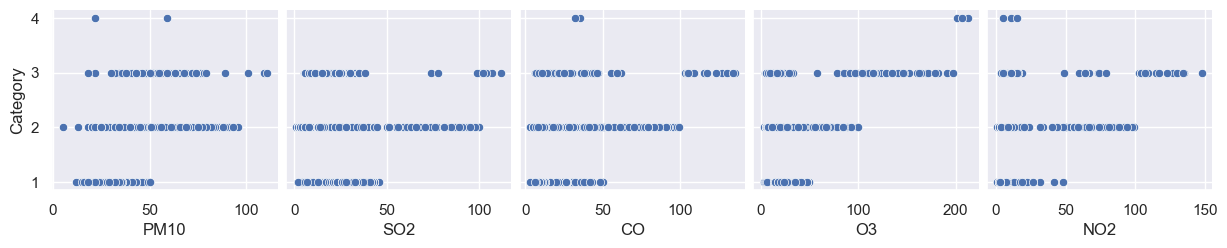

In [31]:
for i in range(0, 1, 5):
    sns.pairplot(data=df_ISPU, x_vars=['PM10', 'SO2', 'CO', 'O3', 'NO2'], y_vars=['Category'])

In [32]:
q1 = df_ISPU.quantile(0.20)
q3 = df_ISPU.quantile(0.80)
iqr = q3-q1

df_ISPU = df_ISPU[~((df_ISPU < (q1 - 1.5 * iqr)) | (df_ISPU > (q3 + 1.5 * iqr))).any(axis=1)]

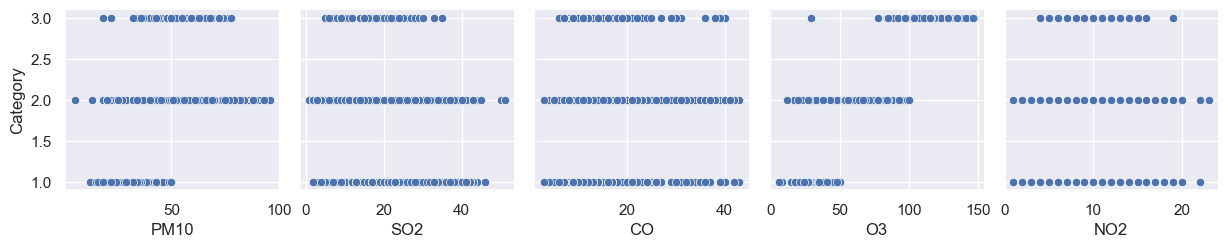

In [33]:
for i in range(0, 1, 5):
    sns.pairplot(data=df_ISPU, x_vars=['PM10', 'SO2', 'CO', 'O3', 'NO2'], y_vars=['Category'])

In [34]:
df_ISPU['PM10'].fillna(df_ISPU['PM10'].mean(), inplace = True)
df_ISPU['SO2'].fillna(df_ISPU['SO2'].median(), inplace = True)
df_ISPU['CO'].fillna(df_ISPU['CO'].median(), inplace = True)
df_ISPU['O3'].fillna(df_ISPU['O3'].mean(), inplace = True)
df_ISPU['NO2'].fillna(df_ISPU['NO2'].median(), inplace = True)

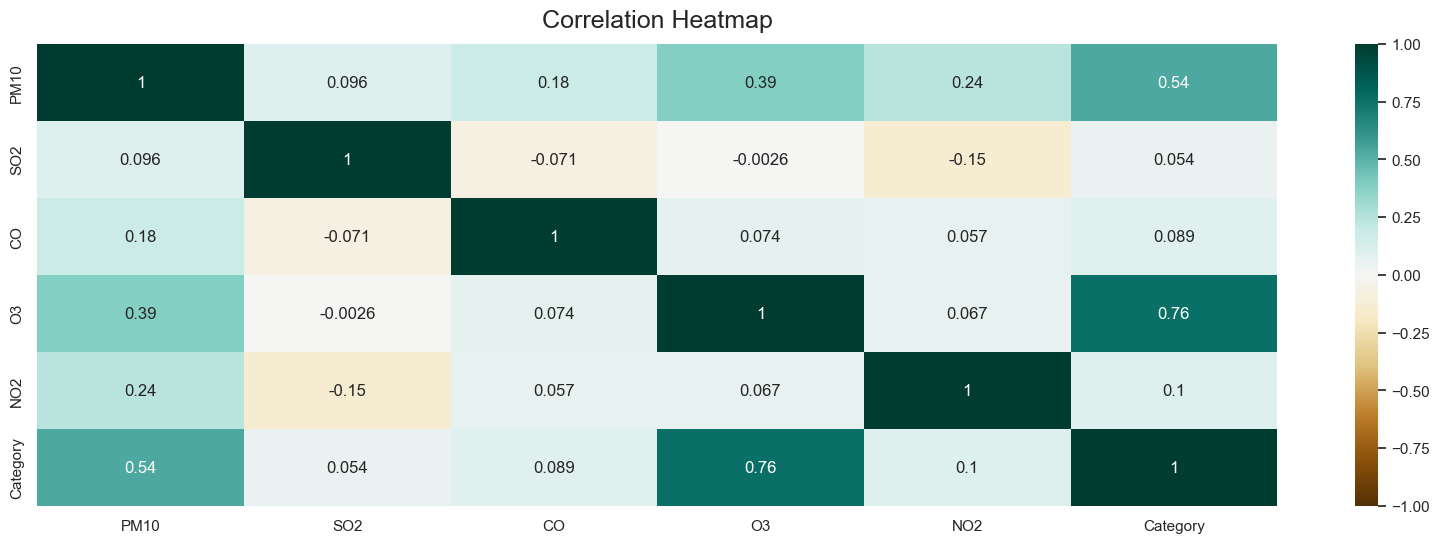

In [35]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df_ISPU.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### 4. Scaling the data

In [36]:
df_ISPU.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,1618.0,50.790903,14.647155,5.0,40.0,52.0,61.0,96.0
SO2,1618.0,19.765760,9.214352,1.0,15.0,19.0,24.0,51.0
CO,1618.0,14.035229,7.840596,3.0,8.0,12.0,18.0,43.0
O3,1618.0,61.443824,24.455299,6.0,44.0,60.0,76.0,147.0
NO2,1618.0,8.296044,3.671852,1.0,6.0,8.0,10.0,23.0
Category,1618.0,1.837454,0.525332,1.0,2.0,2.0,2.0,3.0


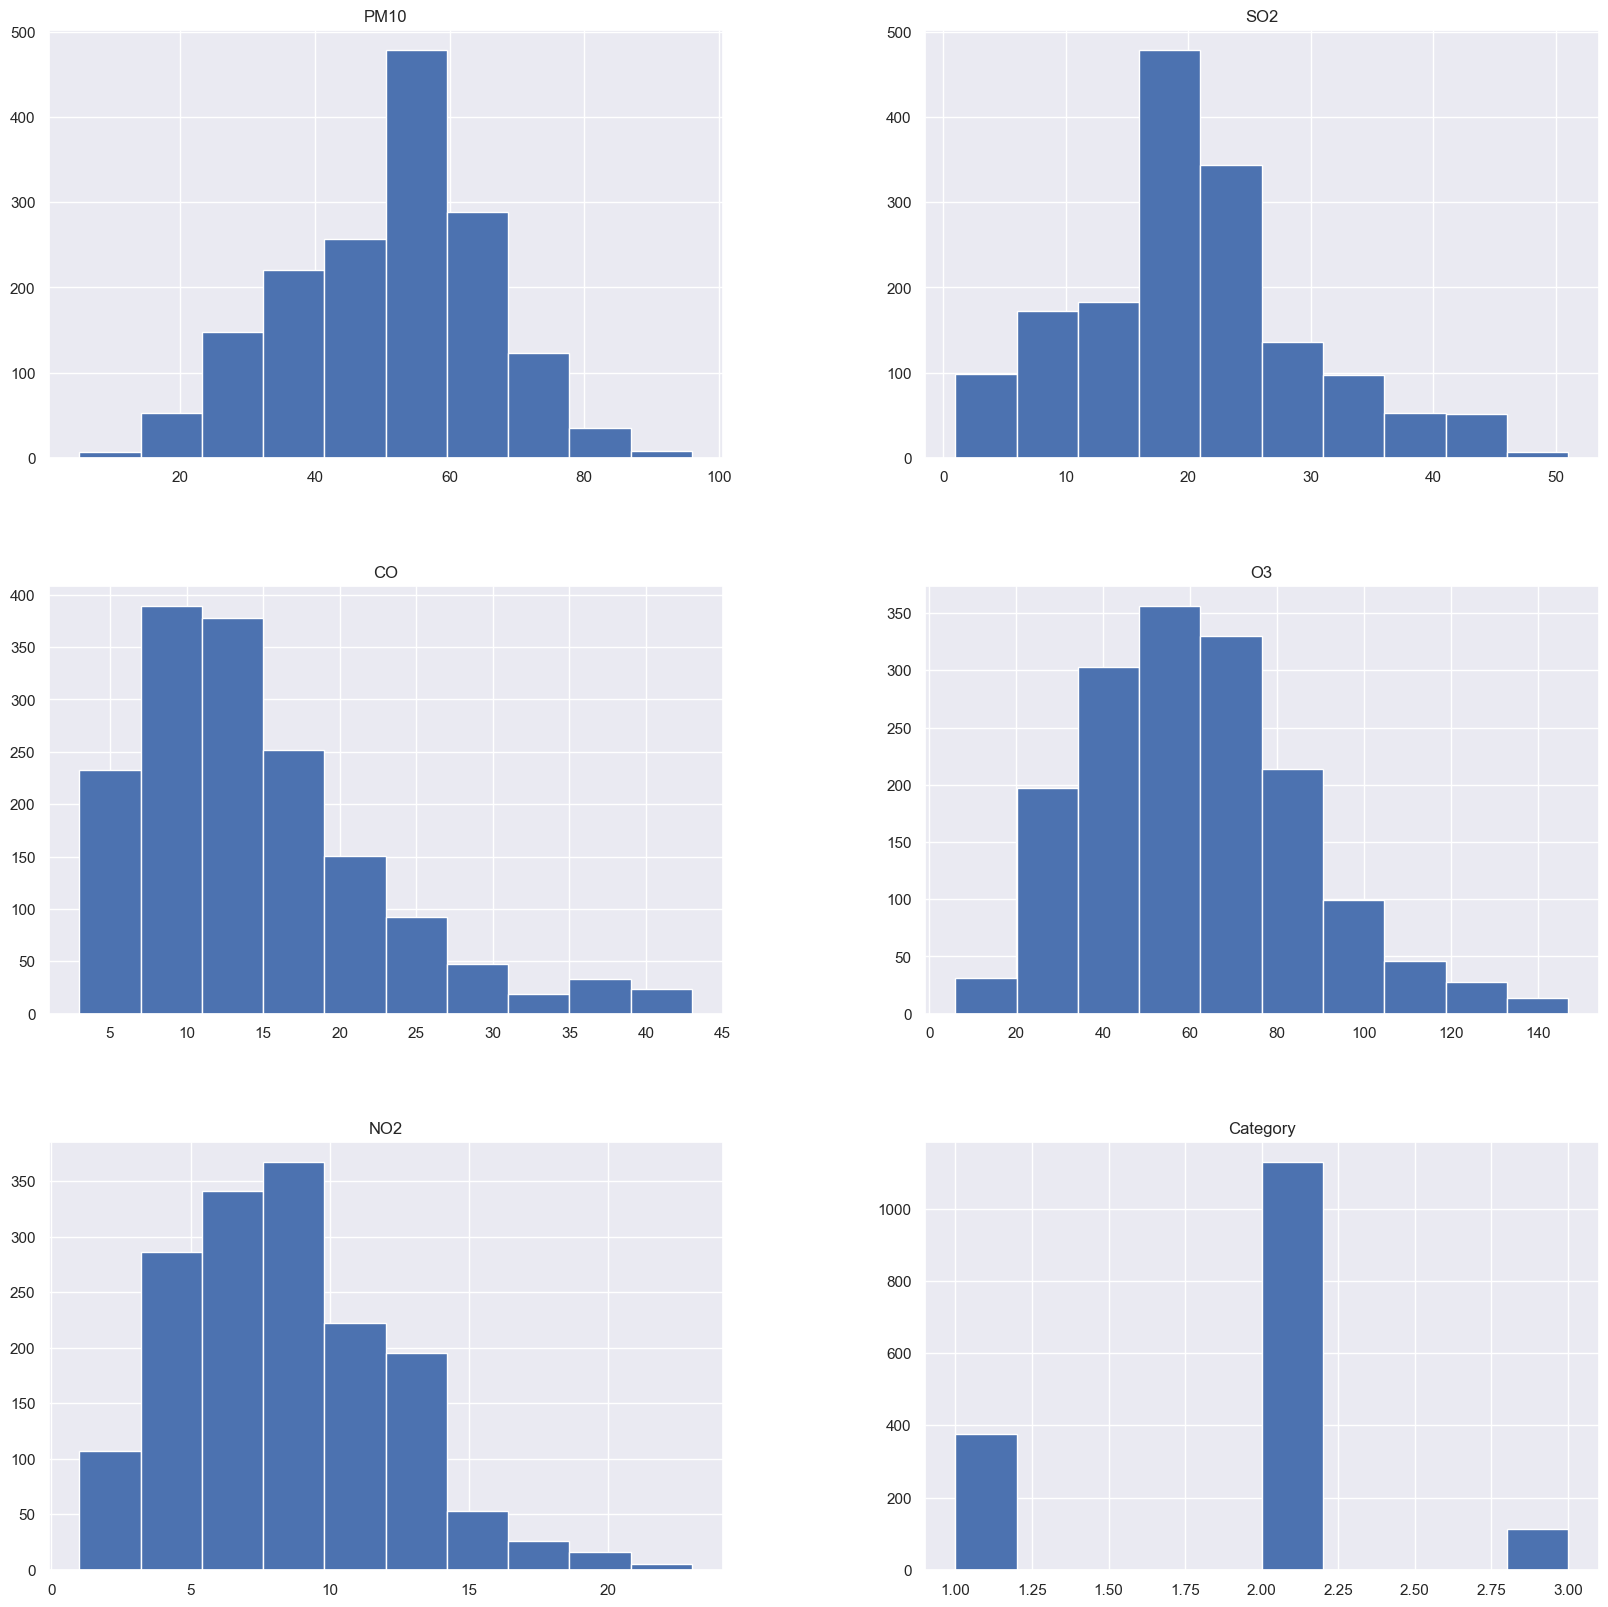

In [37]:
p = df_ISPU.hist(figsize = (20,20))

2    1129
1     376
3     113
Name: Category, dtype: int64


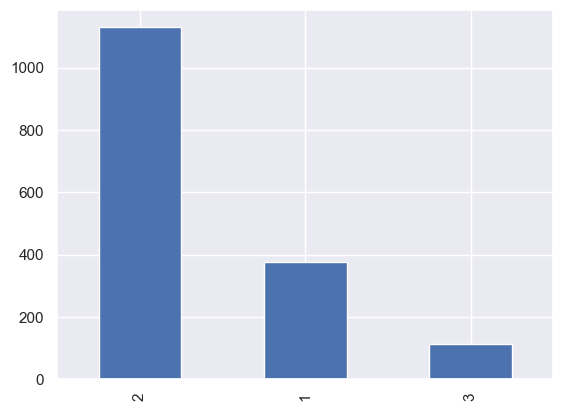

In [38]:
print(df_ISPU.Category.value_counts())
p=df_ISPU.Category.value_counts().plot(kind="bar")

From above, we can see that the data in the histogram is being normally distributed. So I decided to use scaling the variables, so that one does not dominate the other.

In [39]:
X = df_ISPU.drop(["Category"], axis = 1)

In [40]:
y = df_ISPU.Category
y

0       1
1       1
2       1
3       1
4       1
       ..
1825    1
1826    1
1827    1
1828    1
1829    1
Name: Category, Length: 1618, dtype: int32

### 5. Model Building

#### All variables

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

In [42]:
over_and_under_sample =  imblearn.combine.SMOTETomek(n_jobs = -1, random_state = 42)
X_train, y_train = over_and_under_sample.fit_resample(X_train, y_train)

counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({3: 801, 1: 798, 2: 797}) Counter({2: 327, 1: 104, 3: 23})


2    327
1    104
3     23
Name: Category, dtype: int64


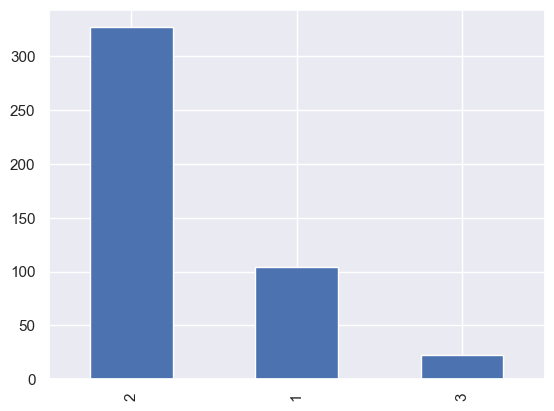

In [43]:
print(y_test.value_counts())
p=y_test.value_counts().plot(kind="bar")

3    801
1    798
2    797
Name: Category, dtype: int64


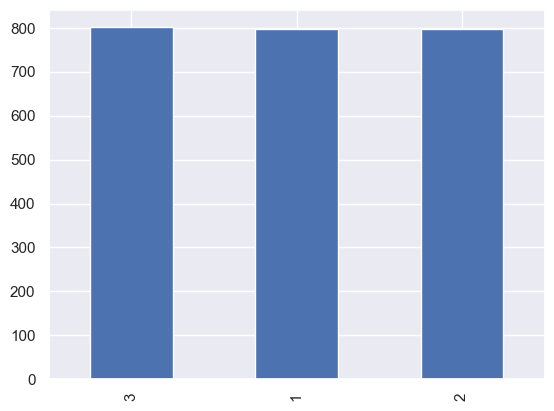

In [44]:
print(y_train.value_counts())
p=y_train.value_counts().plot(kind="bar")

dt = DecisionTreeClassifier()
dtModel = dt.fit(X_train, y_train)
dtPred = dt.predict(X_test)
print(classification_report(y_test, dtPred))

In [45]:
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
fit_rf = RandomForestClassifier()
cv_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs = 3)


rfModel = cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
              precision    recall  f1-score   support

           1       0.94      0.97      0.95       104
           2       0.98      0.95      0.97       327
           3       0.70      0.91      0.79        23

    accuracy                           0.95       454
   macro avg       0.87      0.95      0.90       454
weighted avg       0.96      0.95      0.96       454



In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

O3      0.636443
PM10    0.236606
SO2     0.063466
CO      0.037346
NO2     0.026139
dtype: float64

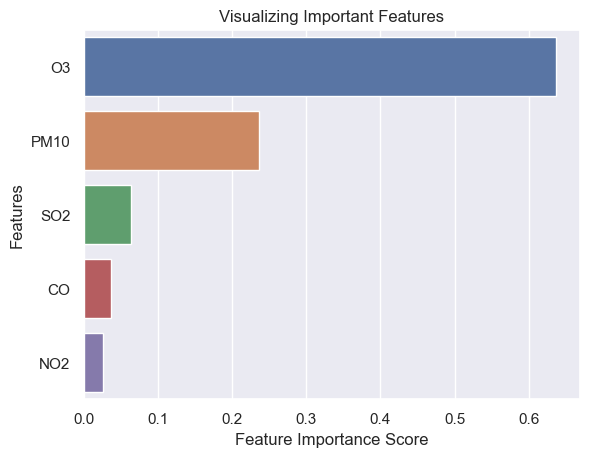

In [48]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()